In [ ]:
!pip install torch torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Define transformations for the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# Load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170M/170M [00:02<00:00, 57.7MB/s]


In [ ]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, batch_size=4,
                         shuffle=True, num_workers=2)

testloader = DataLoader(testset, batch_size=4,
                        shuffle=False, num_workers=2)

In [ ]:
# The transforms are applied when the data is loaded using the DataLoader.
# We can iterate through the trainloader to get batches of transformed images and labels.

dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# You can also print the min, max, mean, std, and var of the images in a batch
print(' - min:', torch.min(images))
print(' - max:', torch.max(images))
print(' - mean:', torch.mean(images))
print(' - std:', torch.std(images))
print(' - var:', torch.var(images))

torch.Size([4, 3, 32, 32])
torch.Size([4])
 - min: tensor(-1.)
 - max: tensor(1.)
 - mean: tensor(-0.1178)
 - std: tensor(0.4514)
 - var: tensor(0.2037)


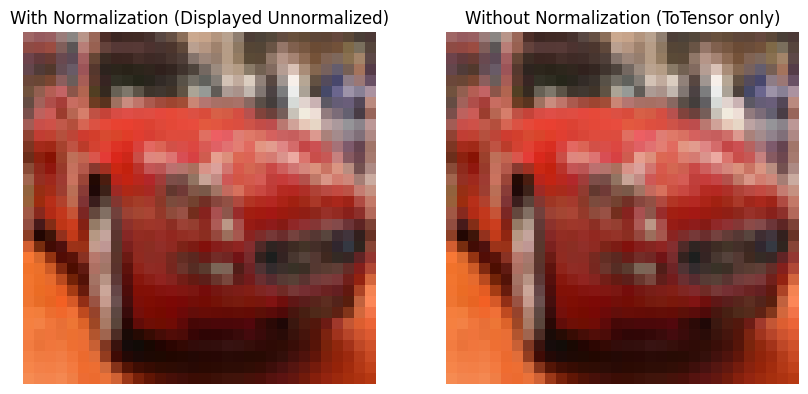

Label: car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Define transforms
transform_normalize = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_no_normalize = transforms.Compose([transforms.ToTensor()])

# Load datasets with different transforms
trainset_normalize = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_normalize)
trainset_no_normalize = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_no_normalize)

# Choose an index for the image you want to compare
image_index = 5 # You can change this index to view a different image

# Get the same image from both datasets
image_normalize, label_normalize = trainset_normalize[image_index]
image_no_normalize, label_no_normalize = trainset_no_normalize[image_index]

# function to show an image
def imshow(img, title=""):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Unnormalize the normalized image for display
img_normalized_display = image_normalize / 2 + 0.5

plt.subplot(1, 2, 1)
imshow(img_normalized_display, title="With Normalization (Displayed Unnormalized)")
plt.axis('off')

plt.subplot(1, 2, 2)
imshow(image_no_normalize, title="Without Normalization (ToTensor only)")
plt.axis('off')

plt.show()

print("Label:", classes[label_normalize]) # Labels should be the same for both

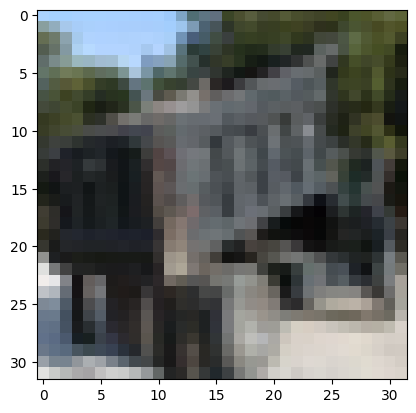

Label: truck
 - min: tensor(0.0078)
 - max: tensor(1.)
 - mean: tensor(0.5470)
 - std: tensor(0.2658)
 - var: tensor(0.0706)


In [ ]:
# Define a transform that only converts to tensor (scales to 0-1)
transform_no_normalize = transforms.Compose([transforms.ToTensor()])

# Load the training dataset without normalization
trainset_no_normalize = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_no_normalize)

# Create a DataLoader for this new dataset
trainloader_no_normalize = DataLoader(trainset_no_normalize, batch_size=4,
                         shuffle=True, num_workers=2)

# Get a batch of images from the new loader
dataiter_no_normalize = iter(trainloader_no_normalize)
images_no_normalize, labels_no_normalize = next(dataiter_no_normalize)

# function to show an image (the unnormalize step is not needed here as data is 0-1)
def imshow_no_normalize(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show one image
imshow_no_normalize(images_no_normalize[0])

# Print label
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Label:', classes[labels_no_normalize[0]])

# You can also print the min, max, mean, std, and var of the images in this batch
print(' - min:', torch.min(images_no_normalize))
print(' - max:', torch.max(images_no_normalize))
print(' - mean:', torch.mean(images_no_normalize))
print(' - std:', torch.std(images_no_normalize))
print(' - var:', torch.var(images_no_normalize))

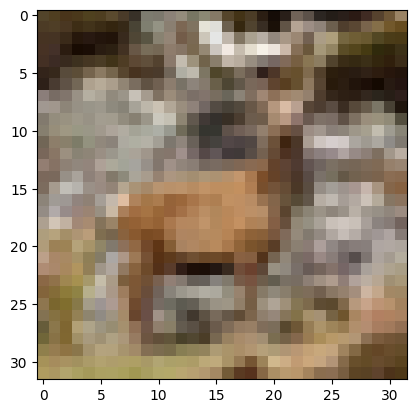

Label: deer


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show one image
imshow(images[0])

# print label
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Label:', classes[labels[0]])

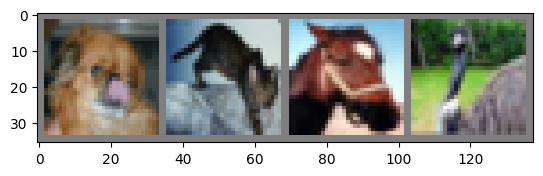

Labels:  dog   cat   horse bird 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images as grid
imshow(torchvision.utils.make_grid(images))

# print labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Labels: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

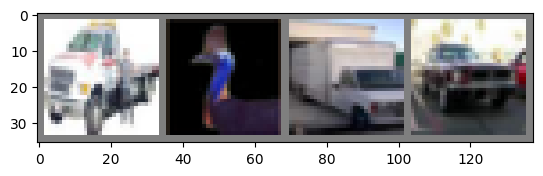

Labels:  truck bird  truck car  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Labels: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

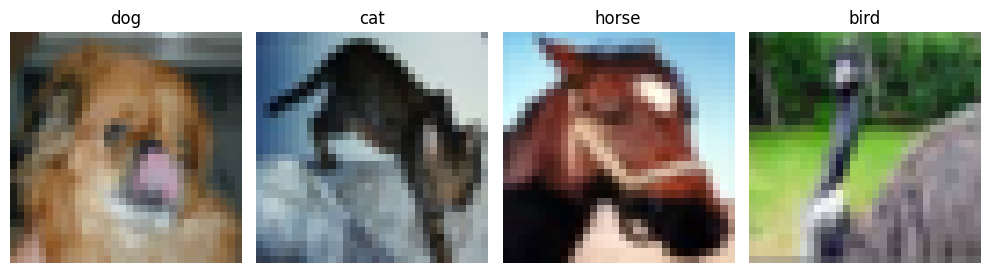

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure(figsize=(10, 10)) # Adjust figure size as needed

# Assuming 'images' and 'labels' from the last batch are still available
# If not, you would need to get a new batch:
# dataiter = iter(trainloader)
# images, labels = next(dataiter)

num_images_in_batch = images.shape[0] # Get the actual number of images in the batch
num_cols = 4 # Number of columns for the grid
num_rows = (num_images_in_batch + num_cols - 1) // num_cols # Calculate rows needed

for index in range(num_images_in_batch):
    plt.subplot(num_rows, num_cols, index + 1)
    plt.axis('off')

    # Unnormalize and transpose the image
    img = images[index] / 2 + 0.5     # unnormalize from [-1, 1] to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Transpose from (C, H, W) to (H, W, C)

    # Optional: Add label as title
    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    plt.title(classes[labels[index]])

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

In [ ]:
import torch.nn.functional as F
class CiferNet(nn.Module):
  def __init__(self):
    super(CiferNet, self).__init__()
    self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        )
